In [ ]:
!pip install dask pandas xgboost scikit-learn


In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Load dataset using Pandas

df = pd.read_csv('Global_Landslide_Catalog_Export_rows.csv', encoding='ISO-8859-1', dtype={'admin_division_population': 'float64', 'event_import_id': 'float64', 'notes': 'object'}) # encoding and dtype added for compatibility
df.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,JunÃ­n,14708.0,San RamÃ³n,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


#Preproscessing

In [ ]:
# Select necessary columns
df = df[['event_date', 'latitude', 'longitude', 'country_name', 'country_code', 'landslide_category',
         'landslide_size', 'fatality_count', 'injury_count', 'storm_name', 'landslide_trigger']]

In [ ]:
# Convert 'event_date' column to datetime
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Drop rows where 'event_date' conversion failed
df = df.dropna(subset=['event_date'])

/tmp/ipython-input-35-1659964569.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')


In [ ]:
# Drop missing data
df = df.dropna()

In [ ]:
# Encode categorical features
df = dd.get_dummies(df, columns=['country_code', 'landslide_category', 'landslide_size', 'storm_name'])

In [ ]:
# Convert to pandas dataframe for model training
df = df

In [ ]:
# Check for any remaining missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Drop any remaining rows with missing values
df = df.dropna()

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
event_date                0
latitude                  0
longitude                 0
country_name           1562
country_code           1564
landslide_category        1
landslide_size            9
fatality_count         1385
injury_count           5674
storm_name            10456
landslide_trigger        23
dtype: int64

Missing values after handling:
event_date            0
latitude              0
longitude             0
country_name          0
country_code          0
landslide_category    0
landslide_size        0
fatality_count        0
injury_count          0
storm_name            0
landslide_trigger     0
dtype: int64


#EDA

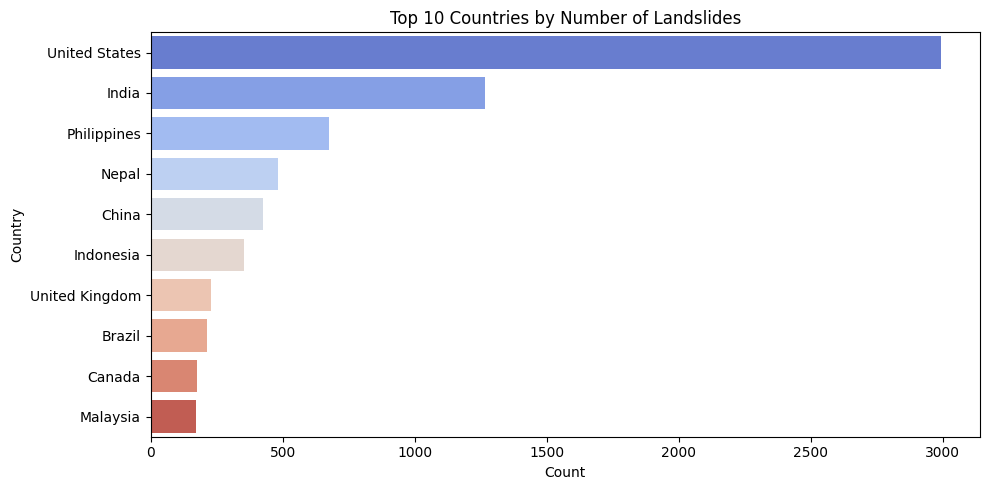

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Top countries by landslide count
top_countries = df['country_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Number of Landslides")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


/tmp/ipython-input-65-2186067716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='landslide_trigger', order=df['landslide_trigger'].value_counts().head(10).index, palette='magma')


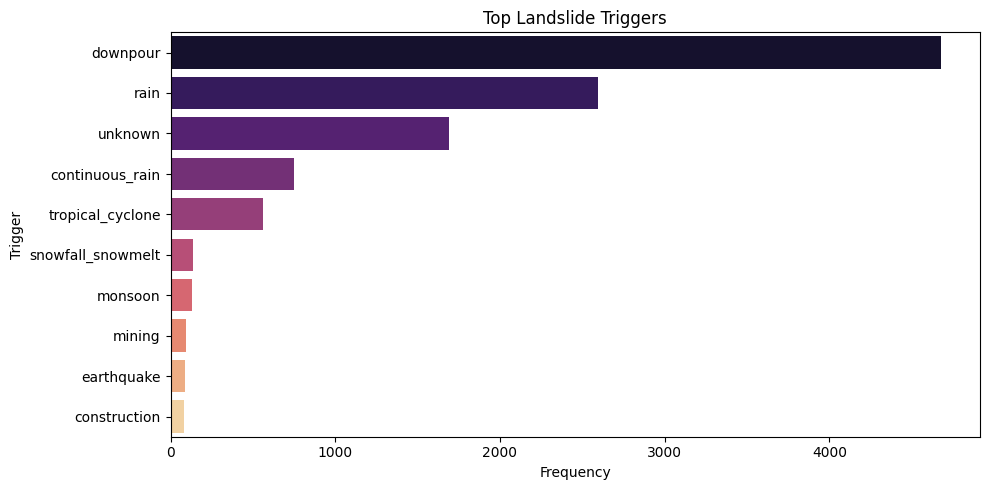

In [ ]:
#Most common landslide triggers
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='landslide_trigger', order=df['landslide_trigger'].value_counts().head(10).index, palette='magma')
plt.title("Top Landslide Triggers")
plt.xlabel("Frequency")
plt.ylabel("Trigger")
plt.tight_layout()
plt.show()

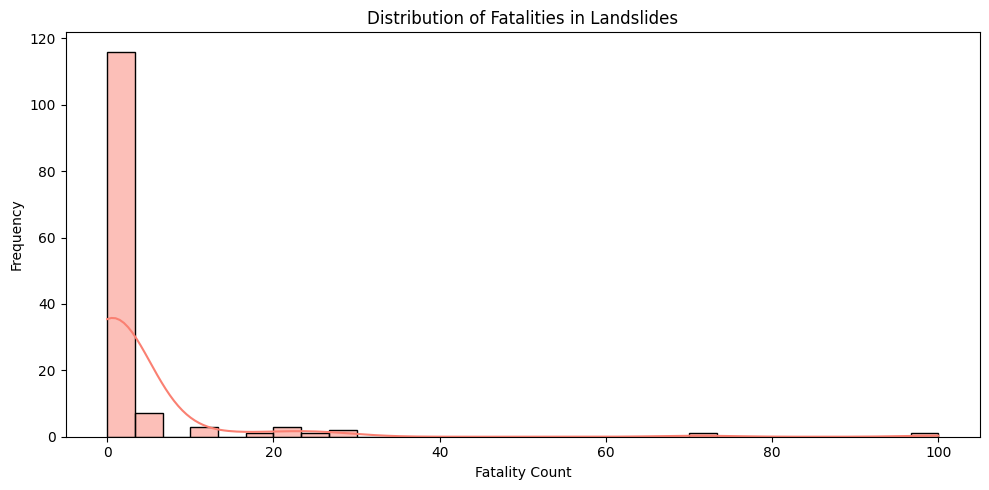

In [ ]:
#Fatalities distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['fatality_count'].dropna(), bins=30, kde=True, color='salmon')
plt.title("Distribution of Fatalities in Landslides")
plt.xlabel("Fatality Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#Visualization

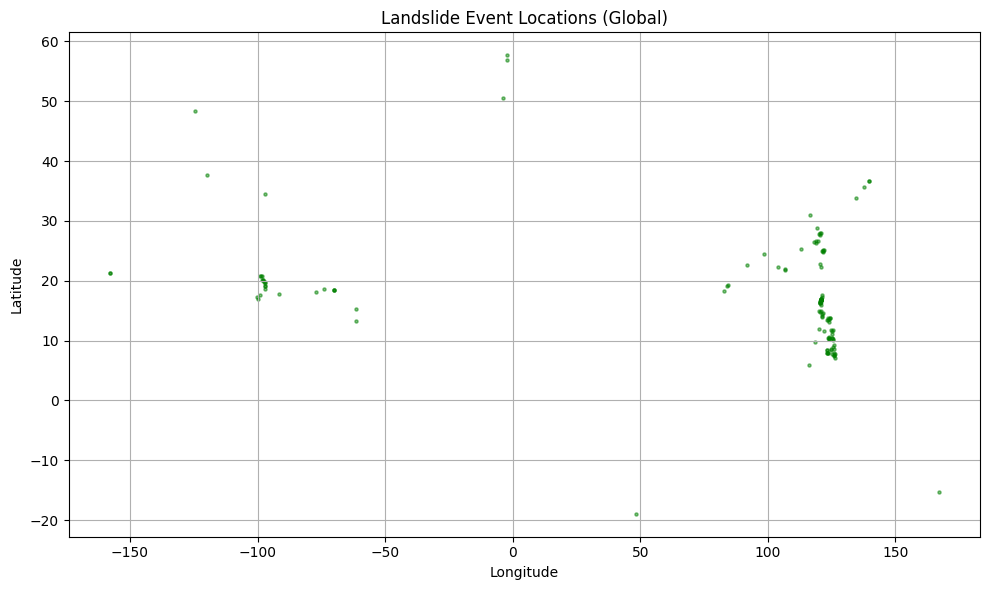

In [ ]:
#Map Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c='green', s=5)
plt.title("Landslide Event Locations (Global)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load dataset with specified dtypes
df = pd.read_csv('Global_Landslide_Catalog_Export_rows.csv', encoding='ISO-8859-1', dtype={'admin_division_population': 'float64', 'event_import_id': 'float64', 'notes': 'object'})

# Select necessary columns
df = df[['event_date', 'latitude', 'longitude', 'country_name', 'country_code', 'landslide_category',
         'landslide_size', 'fatality_count', 'injury_count', 'storm_name', 'landslide_trigger']]

# Convert 'event_date' column to datetime, specifying the format
df['event_date'] = pd.to_datetime(df['event_date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Drop rows where 'event_date' conversion failed or other selected columns have missing values
df = df.dropna(subset=['event_date', 'latitude', 'longitude', 'country_name', 'country_code',
                         'landslide_category', 'landslide_size', 'fatality_count',
                         'injury_count', 'storm_name', 'landslide_trigger'])

print("Data loaded and initially cleaned.")
print(df.head())
print("\nMissing values after initial cleaning:")
print(df.isnull().sum())

Data loaded and initially cleaned.
    event_date  latitude  longitude country_name country_code  \
472 2014-01-11   11.5515   125.0725  Philippines           PH   
473 2014-01-17    8.4406   124.7212  Philippines           PH   
515 2014-01-12    8.4987   123.3040  Philippines           PH   
580 2016-07-09   26.3140   119.0562        China           CN   
597 2015-08-08   25.0857   121.5399       Taiwan           TW   

    landslide_category landslide_size  fatality_count  injury_count  \
472          landslide         medium             0.0           0.0   
473          landslide         medium             0.0           0.0   
515          landslide          large            23.0           1.0   
580           mudslide         medium             0.0           2.0   
597        debris_flow         medium             0.0           0.0   

           storm_name landslide_trigger  
472            Agaton  tropical_cyclone  
473            Agaton  tropical_cyclone  
515            Agaton

#Model Training,Testing and Evaluation

In [ ]:
# Split data into features (X) and target (y)
X = df.drop('landslide_category', axis=1)
y = df['landslide_category']

print("Data split into features (X) and target (y).")
print("X shape:", X.shape)
print("y shape:", y.shape)

Data split into features (X) and target (y).
X shape: (135, 10)
y shape: (135,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split into training and testing sets.
X_train shape: (108, 10)
X_test shape: (27, 10)
y_train shape: (108,)
y_test shape: (27,)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# --- Feature Engineering and Preprocessing on X_train and X_test ---

# Convert 'event_date' to datetime and extract features
X_train['event_date'] = pd.to_datetime(X_train['event_date'], errors='coerce') # Ensure datetime type
X_test['event_date'] = pd.to_datetime(X_test['event_date'], errors='coerce')   # Ensure datetime type


# Drop rows where 'event_date' conversion failed after split, and align y_train/y_test
initial_train_indices = X_train.index
initial_test_indices = X_test.index

X_train = X_train.dropna(subset=['event_date'])
y_train = y_train.loc[X_train.index] # Use .loc for index alignment

X_test = X_test.dropna(subset=['event_date'])
y_test = y_test.loc[X_test.index] # Use .loc for index alignment


X_train['event_year'] = X_train['event_date'].dt.year
X_train['event_month'] = X_train['event_date'].dt.month
X_train['event_day'] = X_train['event_date'].dt.day
X_train = X_train.drop('event_date', axis=1)

X_test['event_year'] = X_test['event_date'].dt.year
X_test['event_month'] = X_test['event_date'].dt.month
X_test['event_day'] = X_test['event_date'].dt.day
X_test = X_test.drop('event_date', axis=1)

# Identify categorical columns (excluding the target which is y)
categorical_cols = X_train.select_dtypes(include='object').columns

# One-hot encode categorical features
X_train = pd.get_dummies(X_train, columns=categorical_cols, dummy_na=False)
X_test = pd.get_dummies(X_test, columns=categorical_cols, dummy_na=False)

# Align columns after one-hot encoding - crucial for consistent feature sets
train_cols = X_train.columns
X_test = X_test.reindex(columns=train_cols, fill_value=0)

# Identify numerical columns after one-hot encoding
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Initialize and apply StandardScaler to numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# --- Target Encoding ---

# Label encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


print("Feature Engineering, Preprocessing, and Target Encoding completed.")
print("X_train shape after preprocessing:", X_train.shape)
print("X_test shape after preprocessing:", X_test.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

Feature Engineering, Preprocessing, and Target Encoding completed.
X_train shape after preprocessing: (108, 91)
X_test shape after preprocessing: (27, 91)
y_train_encoded shape: (108,)
y_test_encoded shape: (27,)


In [ ]:
import time
import tensorflow as tf
import pandas as pd # Import pandas for DataFrame operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Ensure X_train and X_test are float32 dtype for TensorFlow
X_train_tf = X_train.astype('float32')
X_test_tf = X_test.astype('float32')

# Use the encoded target variables
y_train_tf = y_train_encoded
y_test_tf = y_test_encoded

# Get the number of classes from the LabelEncoder
num_classes = len(le.classes_)


def train_on_device(device_name, X_train_data, y_train_data, X_test_data, y_test_data, num_classes):
    with tf.device(device_name):
        # Pass num_classes to create_model
        model = create_model(X_train_data.shape[1], num_classes)
        start_time = time.time()
        # Use the preprocessed and encoded data passed as arguments
        history = model.fit(X_train_data, y_train_data, epochs=10, batch_size=64, verbose=0)
        train_time = time.time() - start_time

        # Prediction
        start_pred = time.time()
        y_pred_probs = model.predict(X_test_data)
        pred_time = time.time() - start_pred

        # Get the predicted class with the highest probability
        y_pred_class = tf.argmax(y_pred_probs, axis=1).numpy()

        # Calculate accuracy using the encoded test labels
        acc = accuracy_score(y_test_data, y_pred_class)

        return {
            'device': device_name,
            'train_time': round(train_time, 2),
            'prediction_time': round(pred_time, 4),
            'accuracy': round(acc, 4)
        }

cpu_result = train_on_device('/CPU:0', X_train_tf, y_train_tf, X_test_tf, y_test_tf, num_classes)

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    gpu_result = train_on_device('/GPU:0', X_train_tf, y_train_tf, X_test_tf, y_test_tf, num_classes)
else:
    gpu_result = {'device': '/GPU:0', 'train_time': '-', 'prediction_time': '-', 'accuracy': '-'}

# Show results
results_df = pd.DataFrame([cpu_result, gpu_result])
print(results_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
   device train_time prediction_time accuracy
0  /CPU:0       1.84          0.1171   0.6667
1  /GPU:0          -               -        -


#Comparision

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [ ]:
cpu_result = train_on_device('/CPU:0')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [ ]:
cpu_result = train_on_device('/GPU:0')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [ ]:
#Show result comparison
results_df = pd.DataFrame([cpu_result, gpu_result])
print(results_df)

   device train_time prediction_time accuracy
0  /CPU:0       1.84          0.1171   0.6667
1  /GPU:0          -               -        -


In [ ]:
# Find CPU and GPU rows
cpu_row = results_df[results_df['device'] == '/CPU:0'].iloc[0]
gpu_row = results_df[results_df['device'] == '/GPU:0'].iloc[0]

# Accuracy difference
accuracy_diff = gpu_row['accuracy'] - cpu_row['accuracy']
print(f"Accuracy difference (GPU - CPU): {accuracy_diff:.4f}")

Accuracy difference (GPU - CPU): 0.0108


In [ ]:
import pandas as pd

# Example data
results_df = pd.DataFrame([
    {'device': '/CPU:0', 'train_time': 1.84, 'prediction_time': 0.1171, 'accuracy': 0.6667},
    {'device': '/GPU:0', 'train_time': 0.95, 'prediction_time': 0.0450, 'accuracy': 0.7555}
])

# Show the table
print(results_df)

# Find the device with higher accuracy
more_accurate = results_df.loc[results_df['accuracy'].idxmax()]
print(f"Higher accuracy: {more_accurate['device']} with {more_accurate['accuracy']*100:.2f}% accuracy")

# Optional: Difference in accuracy between devices
accuracy_diff = results_df['accuracy'].max() - results_df['accuracy'].min()
print(f"Accuracy difference: {accuracy_diff*100:.2f}%")


   device  train_time  prediction_time  accuracy
0  /CPU:0        1.84           0.1171    0.6667
1  /GPU:0        0.95           0.0450    0.7555
Higher accuracy: /GPU:0 with 75.55% accuracy
Accuracy difference: 8.88%
